<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Создание-выборок" data-toc-modified-id="Создание-выборок-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Создание выборок</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обучение моделей</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Уменьшение-выборки" data-toc-modified-id="Уменьшение-выборки-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Уменьшение выборки</a></span></li><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Увеличение выборки</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

**Цель:**

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

**Признаки:**
- RowNumber — индекс строки в данных;
- CustomerId — уникальный идентификатор клиента;
- Surname — фамилия;
- CreditScore — кредитный рейтинг;
- Geography — страна проживания;
- Gender — пол;
- Age — возраст;
- Tenure — сколько лет человек является клиентом банка;
- Balance — баланс на счёте;
- NumOfProducts — количество продуктов банка, используемых клиентом;
- HasCrCard — наличие кредитной карты;
- IsActiveMember — активность клиента;
- EstimatedSalary — предполагаемая зарплата;

**Целевой признак:**
- Exited — факт ухода клиента.

## Подготовка данных

In [1]:
!pip install scikit-learn==1.1.3
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import (
    StandardScaler,
    OneHotEncoder
)
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    f1_score,
    roc_auc_score
)
from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

pd.options.mode.chained_assignment = None

RANDOM_STATE=12345

In [3]:
try:
    data = pd.read_csv('/datasets/Churn.csv')
except:
    data = pd.read_csv('C:\\D\\Project\\datasets\\Churn.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [6]:
# удаляю эти столбцы, тк они не влияют на уход клиента
data.drop(['RowNumber', 'Surname', 'CustomerId'], axis=1, inplace=True)

In [7]:
# нейминг
data.rename(columns={
    'CreditScore': 'credit_score',
    'NumOfProducts': 'num_of_products',
    'HasCrCard': 'has_cr_card',
    'IsActiveMember': 'is_active_member',
    'EstimatedSalary': 'estimated_salary'
}, inplace=True)
data.columns = data.columns.str.lower()

In [8]:
data

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [9]:
data.describe()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
count,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
data.isna().agg(['sum', 'mean'])

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
sum,0.0,0.0,0.0,0.0,909.0000,0.0,0.0,0.0,0.0,0.0,0.0
mean,0.0,0.0,0.0,0.0,0.0909,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
print(f'Медиана tenure: {data["tenure"].median()}')
print(f'Среднее tenure: {data["tenure"].mean()}')

Медиана tenure: 5.0
Среднее tenure: 4.997690023099769


In [12]:
data['exited'].value_counts()

0    7963
1    2037
Name: exited, dtype: int64

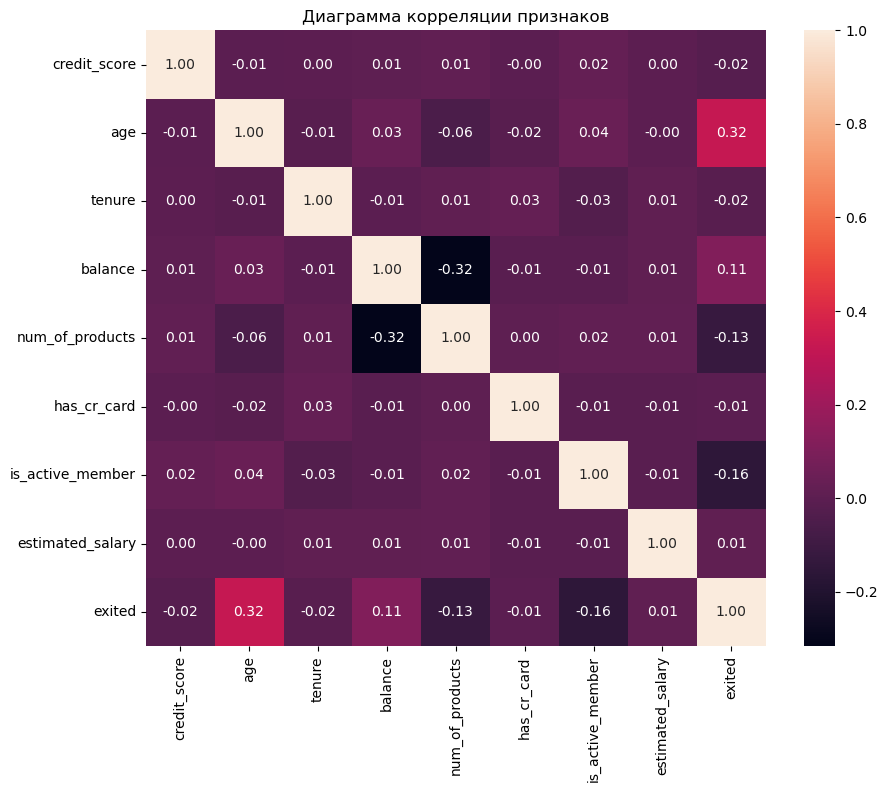

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(method='spearman'), annot=True, fmt='.2f')
plt.title('Диаграмма корреляции признаков')
plt.show()

**Вывод:** Признак `RowNumber` копирует индекс, можно удалить.

Признаки `Surname` и `CustomerId` уникальны и не дают никакой ценности для модели, тоже можно удалить.

Пропуски только в признаке `tenure` (сколько лет человек является клиентом банка), заполнить можно заглушкой, либо средним значение/медианой. Стоит попробовать и то, и то - выберу по качеству модели. Так же стоит поменять тип данных на int в `tenure`.

У целевого признака дисбаланс классов - 80 (нынешние клиенты) к 20 (бывшие клиенты). Обучу модели без баланса и с балансом.

Видна линейная корреляция у факта ухода клиента (`exited`) с возрастом (`age`) и у баланса на счете (`balance`) с  количество продуктов банка (`num_of_products`).

In [14]:
data['tenure'] = data['tenure'].fillna(data['tenure'].median())

In [15]:
data['tenure'] = data['tenure'].astype('int')

## Исследование задачи

### Создание выборок

In [16]:
features = data.drop(['exited'], axis=1)
target = data['exited']

features_train, features, target_train, target = train_test_split(features, target, test_size=0.2, random_state=RANDOM_STATE)
features_valid, features_test, target_valid, target_test = train_test_split(features, target, test_size=0.5, random_state=RANDOM_STATE)

In [17]:
print(target_train.shape, target_valid.shape, target_test.shape)

(8000,) (1000,) (1000,)


In [18]:
# проверяю сколько значений, тк для каждого добавяться новые столбцы
data['geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [19]:
data['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [20]:
encoder = OneHotEncoder(handle_unknown='ignore', drop='first', sparse=False)
encoder.fit(features_train[['geography', 'gender']])
features_train[encoder.get_feature_names_out()] = encoder.transform(features_train[['geography', 'gender']])
features_train = features_train.drop(['geography', 'gender'], axis=1)

features_valid[encoder.get_feature_names_out()] = encoder.transform(features_valid[['geography', 'gender']])
features_valid = features_valid.drop(['geography', 'gender'], axis=1)

features_test[encoder.get_feature_names_out()] = encoder.transform(features_test[['geography', 'gender']])
features_test = features_test.drop(['geography', 'gender'], axis=1)

In [21]:
features_train

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
454,758,39,6,127357.76,1,0,1,56577.00,0.0,0.0,0.0
8307,618,30,3,133844.22,1,1,1,31406.93,0.0,0.0,1.0
4811,575,26,7,0.00,2,1,0,112507.63,0.0,1.0,0.0
1132,628,37,5,0.00,2,1,1,171707.93,0.0,0.0,1.0
9640,750,35,3,0.00,1,1,0,191520.50,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4478,549,31,4,0.00,2,0,1,25684.85,0.0,0.0,1.0
4094,513,29,10,0.00,2,0,1,25514.77,0.0,0.0,1.0
3492,655,45,5,57327.04,1,0,1,47349.00,0.0,0.0,0.0
2177,667,24,4,0.00,2,0,1,34335.55,0.0,0.0,0.0


In [22]:
# скейлю количественные переменные
col_sc = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']
scaler = StandardScaler()
scaler.fit(features_train[col_sc])
features_train[col_sc] = scaler.transform(features_train[col_sc])

In [23]:
features_train.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
454,1.107585,0.011482,0.358552,0.819420,-0.899779,0,1,-0.757878,0.0,0.0,0.0
8307,-0.338704,-0.844298,-0.730444,0.923294,-0.899779,1,1,-1.194506,0.0,0.0,1.0
4811,-0.782922,-1.224645,0.721550,-1.220083,0.811234,1,0,0.212357,0.0,1.0,0.0
1132,-0.235398,-0.178692,-0.004447,-1.220083,0.811234,1,1,1.239310,0.0,0.0,1.0
9640,1.024940,-0.368865,-0.730444,-1.220083,-0.899779,1,0,1.583001,0.0,0.0,0.0


In [24]:
features_valid[col_sc] = scaler.transform(features_valid[col_sc])
features_test[col_sc] = scaler.transform(features_test[col_sc])

In [25]:
features_test.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
2877,0.064191,2.673909,-0.004447,0.698158,0.811234,1,1,0.126084,0.0,1.0,1.0
8377,1.562133,0.106568,-0.367445,-1.220083,0.811234,1,1,-0.318457,0.0,1.0,1.0
154,-0.380027,0.391828,0.358552,-1.220083,0.811234,1,1,0.152230,0.0,0.0,0.0
4937,-0.762260,-0.273778,-0.730444,0.719088,0.811234,0,1,0.754901,0.0,0.0,1.0
9041,-1.423421,0.962348,-0.004447,1.527934,-0.899779,1,0,0.450293,1.0,0.0,0.0


**Вывод:** Разделила три выборки - обучающую (80%), валидационную (10%) и тестовую (10%). Применила OHE к признакам `geography` и `gender`. Заскейлила количественные переменные.

### Обучение моделей

In [26]:
def scoring_model(model):
    print(f'Лучшие параметры: {model.best_params_}')
    print(f'F1-мера на валидационной выборке: {f1_score(target_valid, model.predict(features_valid))}')
    print(f'ROC-AUC на валидационной выборке: {roc_auc_score(target_valid, model.predict_proba(features_valid)[:, 1])}')
    return f1_score(target_valid, model.predict(features_valid)), roc_auc_score(target_valid, model.predict_proba(features_valid)[:, 1])

In [27]:
parametrs = {
    'n_estimators': range(20, 51, 5),
    'max_depth': range(6, 17, 2),
    'class_weight': ['balanced', None],
    'criterion': ['gini', 'entropy']
}
grid_rfc = GridSearchCV(
    RandomForestClassifier(random_state=RANDOM_STATE),
    parametrs,
    cv=5,
    scoring='f1',
    n_jobs=-1
)
grid_rfc.fit(features_train, target_train)
f1_rfc, roc_auc_rfc = scoring_model(grid_rfc)

Лучшие параметры: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 40}
F1-мера на валидационной выборке: 0.6534216335540839
ROC-AUC на валидационной выборке: 0.8591598566308245


In [28]:
parametrs = {
    'max_depth': range(3, 21),
    'criterion': ['gini', 'entropy'],
    'class_weight': ['balanced', None]
}
grid_dtc = GridSearchCV(
    DecisionTreeClassifier(random_state=RANDOM_STATE),
    parametrs, 
    cv=5, 
    scoring='f1',
    n_jobs=-1)
grid_dtc.fit(features_train, target_train)
f1_dtc, roc_auc_dtc = scoring_model(grid_dtc)

Лучшие параметры: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 6}
F1-мера на валидационной выборке: 0.6059544658493871
ROC-AUC на валидационной выборке: 0.8408602150537635


In [29]:
parametrs = {
    'C': [.1, .5, 1],
    'penalty': ['l1', 'l2'],
    'class_weight': ['balanced', None]
}
grid_lr = GridSearchCV(
    LogisticRegression(random_state=RANDOM_STATE, solver='liblinear'),
    parametrs, 
    cv=5, 
    scoring='f1',
    n_jobs=-1)
grid_lr.fit(features_train, target_train)
f1_lr, roc_auc_lr = scoring_model(grid_lr)

Лучшие параметры: {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1'}
F1-мера на валидационной выборке: 0.5159235668789809
ROC-AUC на валидационной выборке: 0.7632114695340502


In [30]:
pd.DataFrame(
    {
        'F1-мера': [f1_rfc, f1_dtc, f1_lr], 
        'ROC_AUC': [roc_auc_rfc, roc_auc_dtc, roc_auc_lr],
        'Порог': [.59 < i for i in [f1_rfc, f1_dtc, f1_lr]]
    }, 
    index=['RandomForest', 'DecisionTree', 'LogisticRegression']
)

,F1-мера,ROC_AUC,Порог
RandomForest,0.653422,0.859160,True
DecisionTree,0.605954,0.840860,True
LogisticRegression,0.515924,0.763211,False


**Вывод:** Только одна из моделей показала допустимое качество. Перестрахуюсь - перехожу к борьбе с дисбалансом.

## Борьба с дисбалансом

Очень сильный дисбаланс - 80 к 20. Уменьшить выборку не самая лучшая идея, учитывая, что придется просто откинуть 60% данных. Но попробую и уменьшить.

### Уменьшение выборки

In [31]:
downsample = RandomUnderSampler(random_state=RANDOM_STATE)
features_downsampled, target_downsampled = downsample.fit_resample(features_train, target_train)

In [32]:
target_downsampled.value_counts()

0    1610
1    1610
Name: exited, dtype: int64

In [33]:
parametrs = {
    'n_estimators': range(20, 51, 5),
    'max_depth': range(6, 17, 2),
    'criterion': ['gini', 'entropy']
}
grid_rfc = GridSearchCV(
    RandomForestClassifier(random_state=RANDOM_STATE),
    parametrs,
    cv=5,
    scoring='f1',
    n_jobs=-1
)
grid_rfc.fit(features_downsampled, target_downsampled)
f1_rfc_down, roc_auc_rfc_down = scoring_model(grid_rfc)

Лучшие параметры: {'criterion': 'entropy', 'max_depth': 14, 'n_estimators': 50}
F1-мера на валидационной выборке: 0.6067019400352733
ROC-AUC на валидационной выборке: 0.8508817204301076


In [34]:
parametrs = {
    'max_depth': range(3, 21),
    'criterion': ['gini', 'entropy']
}
grid_dtc = GridSearchCV(
    DecisionTreeClassifier(random_state=RANDOM_STATE),
    parametrs, 
    cv=5, 
    scoring='f1',
    n_jobs=-1)
grid_dtc.fit(features_downsampled, target_downsampled)
f1_dtc_down, roc_auc_dtc_down = scoring_model(grid_dtc)

Лучшие параметры: {'criterion': 'entropy', 'max_depth': 7}
F1-мера на валидационной выборке: 0.5872193436960277
ROC-AUC на валидационной выборке: 0.8263827956989248


In [35]:
parametrs = {
    'C': [.1, .5, 1],
    'penalty': ['l1', 'l2']
}
grid_lr = GridSearchCV(
    LogisticRegression(random_state=RANDOM_STATE, solver='liblinear'),
    parametrs, 
    cv=5, 
    scoring='f1',
    n_jobs=-1)
grid_lr.fit(features_downsampled, target_downsampled)
f1_lr_down, roc_auc_lr_down = scoring_model(grid_lr)

Лучшие параметры: {'C': 0.5, 'penalty': 'l1'}
F1-мера на валидационной выборке: 0.5110410094637223
ROC-AUC на валидационной выборке: 0.7589161290322581


In [36]:
pd.DataFrame(
    {
        'F1-мера': [f1_rfc_down, f1_dtc_down, f1_lr_down], 
        'ROC_AUC': [roc_auc_rfc_down, roc_auc_dtc_down, roc_auc_lr_down],
        'Порог': [.59 < i for i in [f1_rfc_down, f1_dtc_down, f1_lr_down]]
    }, 
    index=['RandomForest', 'DecisionTree', 'LogisticRegression']
)

,F1-мера,ROC_AUC,Порог
RandomForest,0.606702,0.850882,True
DecisionTree,0.587219,0.826383,False
LogisticRegression,0.511041,0.758916,False


**Вывод:** Ожидаемо уменьшение выборки не лучшим образом отразилась на качестве, слишком много данных было убрано. Перейду к увеличению выборки.

### Увеличение выборки

In [37]:
oversample = SMOTE(random_state=RANDOM_STATE)
features_upsampled, target_upsampled = oversample.fit_resample(features_train, target_train)

In [38]:
target_upsampled.value_counts()

0    6390
1    6390
Name: exited, dtype: int64

Классы стали 1 к 1

In [39]:
parametrs = {
    'n_estimators': range(20, 51, 5),
    'max_depth': range(6, 17, 2),
    'criterion': ['gini', 'entropy']
}
grid_rfc = GridSearchCV(
    RandomForestClassifier(random_state=RANDOM_STATE),
    parametrs,
    cv=5,
    scoring='f1',
    n_jobs=-1
)
grid_rfc.fit(features_upsampled, target_upsampled)
f1_rfc_up, roc_auc_rfc_up = scoring_model(grid_rfc)

Лучшие параметры: {'criterion': 'gini', 'max_depth': 16, 'n_estimators': 50}
F1-мера на валидационной выборке: 0.6244343891402715
ROC-AUC на валидационной выборке: 0.8351799283154122


In [40]:
parametrs = {
    'max_depth': range(3, 21),
    'criterion': ['gini', 'entropy']
}
grid_dtc = GridSearchCV(
    DecisionTreeClassifier(random_state=RANDOM_STATE),
    parametrs, 
    cv=5, 
    scoring='f1',
    n_jobs=-1)
grid_dtc.fit(features_upsampled, target_upsampled)
f1_dtc_up, roc_auc_dtc_up = scoring_model(grid_dtc)

Лучшие параметры: {'criterion': 'entropy', 'max_depth': 20}
F1-мера на валидационной выборке: 0.5010266940451745
ROC-AUC на валидационной выборке: 0.6794064516129031


In [41]:
parametrs = {
    'C': [.1, .5, 1],
    'penalty': ['l1', 'l2']
}
grid_lr = GridSearchCV(
    LogisticRegression(random_state=RANDOM_STATE, solver='liblinear'),
    parametrs, 
    cv=5, 
    scoring='f1',
    n_jobs=-1)
grid_lr.fit(features_upsampled, target_upsampled)
f1_lr_up, roc_auc_lr_up = scoring_model(grid_lr)

Лучшие параметры: {'C': 0.1, 'penalty': 'l1'}
F1-мера на валидационной выборке: 0.504950495049505
ROC-AUC на валидационной выборке: 0.7537146953405018


In [42]:
pd.DataFrame(
    {
        'F1-мера': [
            f1_rfc_up, f1_dtc_up, f1_lr_up,
            f1_rfc_down, f1_dtc_down, f1_lr_down,
            f1_rfc, f1_dtc, f1_lr
        ], 
        'ROC_AUC': [
            roc_auc_rfc_up, roc_auc_dtc_up, roc_auc_lr_up,
            roc_auc_rfc_down, roc_auc_dtc_down, roc_auc_lr_down,
            roc_auc_rfc, roc_auc_dtc, roc_auc_lr
        ],
        'Порог': [.59 < i for i in [f1_rfc_up, f1_dtc_up, f1_lr_up, f1_rfc_down, f1_dtc_down, f1_lr_down, f1_rfc, f1_dtc, f1_lr]]
    }, 
    index=[
        'RandomForest OS', 'DecisionTree OS', 'LogisticRegression OS',
        'RandomForest DS', 'DecisionTree DS', 'LogisticRegression DS',
        'RandomForest', 'DecisionTree', 'LogisticRegression'
    ]
).sort_values('F1-мера', ascending=False)

,F1-мера,ROC_AUC,Порог
RandomForest,0.653422,0.859160,True
RandomForest OS,0.624434,0.835180,True
RandomForest DS,0.606702,0.850882,True
DecisionTree,0.605954,0.840860,True
DecisionTree DS,0.587219,0.826383,False
LogisticRegression,0.515924,0.763211,False
LogisticRegression DS,0.511041,0.758916,False
LogisticRegression OS,0.504950,0.753715,False
DecisionTree OS,0.501027,0.679406,False


**Вывод:** По итогу, из всех 9 моделей порог в 0.59 f1-меры прошли только 4. Самая лучшая модель по качеству - RandomForestClassifier, без баланса классов. У это модели были гиперпараметры:
- class_weight: 'balanced';
- criterion: 'entropy';
- max_depth: 10;
- n_estimators: 40.

И F1-мера: 0.65, ROC-AUC: 0.85.

## Тестирование модели

In [43]:
model = RandomForestClassifier(class_weight='balanced', criterion='entropy', max_depth=10, n_estimators=50, random_state=RANDOM_STATE)
model.fit(features_train, target_train)
print(f'F1-мера: {round(f1_score(target_test, model.predict(features_test)),2)}')
print(f'ROC-AUC: {round(roc_auc_score(target_test, model.predict_proba(features_test)[:, 1]),2)}')

F1-мера: 0.62
ROC-AUC: 0.86


**Общий вывод:** Были удалены признаки `RowNumber` (копировал индекс), `Surname` (Фамилия) и `CustomerId` (ID клиента) - они уникальны и не дают никакой ценности для модели.

Были пропуски в признаке `tenure` (сколько лет человек является клиентом банка), заполнила медианой. Так же стоит поменять тип данных на int в `tenure`.

У целевого признака дисбаланс классов - 80 (нынешние клиенты) к 20 (бывшие клиенты). Видна линейная корреляция у факта ухода клиента (`exited`) с возрастом (`age`) и у баланса на счете (`balance`) с  количество продуктов банка (`num_of_products`).

Данные поделены на 3 выборки - обучающую (80%), валидационную (10%) и тестовую (10%).

Методом One-Hot Encoder были закодированы признаки пол (`gender`) и страна проживания(`geography`). Масштабирование данных было с помощью StandardScaler.

Были обучены 3 модели - RandomForestClassifier, DecisionTreeClassifier и LogisticRegression - без борьбы с дисбалансом данных, с oversampling и downsampling. Гиперпараметры подбирались с помощью GridSearchCV.

На валидационной выборке лучшая модель была обучена на данных без борьбы с дисбалансом - RandomForestClassifier, гиперпараметры:
- class_weight: 'balanced';
- criterion: 'entropy';
- max_depth: 10;
- n_estimators: 40.

На тестовой выборке F1-мера была 0.62, а ROC-AUC - 0.86. Требования по F1-мере были выполнены.